### 1. Import Libraries

In [1]:
!pip install datasets
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3


In [14]:
pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 30.5 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=d0d004dbaf9a3cc1e0ad5ad85eaf051f05400e0a01f7af1980adbd23d7d621f0
  Stored

In [3]:
import pandas as pd
import os
import re
import numpy as np
from keras.layers import Input
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Embedding, Bidirectional, GRU
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam

### 2. Data Loading

In [5]:
import pandas as pd
from datasets import Dataset, DatasetDict

TRAIN_PATH = 'train(1).csv'
VAL_PATH = 'val(1).csv'
TEST_PATH = 'test(1).csv'

train_df = pd.read_csv(TRAIN_PATH)
val_df = pd.read_csv(VAL_PATH)
test_df = pd.read_csv(TEST_PATH)

test_df = test_df.rename(columns={'cmt': 'comment'})
test_df = test_df.rename(columns={'id': 'cmtId'})

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

raw_datasets = DatasetDict({'train': train_dataset, 'val': val_dataset, 'test': test_dataset})

df_train = pd.read_csv(TRAIN_PATH)
df_val = pd.read_csv(VAL_PATH)
df_test = pd.read_csv(TEST_PATH)

df_test = df_test.rename(columns={'cmt': 'comment'})
df_test = df_test.rename(columns={'id': 'cmtId'})

### 3. Data Prepare

#### Standardlize Ouput

In [6]:
def make_outputs(df):
    outputs = []
    for row in range(len(df)):
        row_one_hot = []
        for col in range(2, len(df.columns)):
            sentiment = df.iloc[row, col]
            if sentiment == 0:
                row_one_hot.append([1, 0, 0])  # None
            elif sentiment == 1:
                row_one_hot.append([0, 1, 0])  # Pos
            elif sentiment == 2:
                row_one_hot.append([0, 0, 1])  # Neg
        outputs.append(row_one_hot)
    return np.array(outputs, dtype='uint8')

y_train = make_outputs(df_train)
y_val = make_outputs(df_val)
y_test = make_outputs(df_test)

#### Tokenizing

In [8]:
from transformers import AutoTokenizer

PRETRAINED_MODEL = 'vinai/phobert-base'
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)

def tokenize_function(dataset):
    cmt_texts = dataset['comment']
    return tokenizer(cmt_texts, max_length=tokenizer.model_max_length, padding='max_length', truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)


Map:   0%|          | 0/2920 [00:00<?, ? examples/s]

Map:   0%|          | 0/626 [00:00<?, ? examples/s]

Map:   0%|          | 0/370 [00:00<?, ? examples/s]

#### Prepare for Models

In [17]:
MAX_SEQUENCE_LENGTH = tokenizer.model_max_length
MODEL_PATH = 'reviews_shopee_model'
BATCH_SIZE = 20

STEPS_PER_EPOCH = len(raw_datasets['train']) // (BATCH_SIZE)
VALIDATION_STEPS = len(raw_datasets['val']) // (BATCH_SIZE)
EPOCHS = 10

In [18]:
def to_tensorflow_format(tokenized_dataset):
    features = tokenized_dataset.features
    return tokenized_dataset.remove_columns(list(features)[:-3]).with_format('tensorflow')

from tensorflow.data import Dataset
def preprocess_tokenized_dataset(tokenized_dataset, tokenizer, labels, batch_size, shuffle=False,repeat=True):
    tf_dataset = to_tensorflow_format(tokenized_dataset)
    features = {x: tf_dataset[x] for x in tokenizer.model_input_names}
    labels = labels.reshape(len(labels), -1)

    tf_dataset = Dataset.from_tensor_slices((features, labels))

    if shuffle:
        tf_dataset = tf_dataset.shuffle(buffer_size=len(tf_dataset))
    tf_dataset = tf_dataset.batch(batch_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    if repeat:
        tf_dataset = tf_dataset.repeat(10)  # Repeat the dataset for multiple epochs

    return tf_dataset

train_tf_dataset = preprocess_tokenized_dataset(tokenized_datasets['train'], tokenizer, y_train, BATCH_SIZE, shuffle=True)
val_tf_dataset = preprocess_tokenized_dataset(tokenized_datasets['val'], tokenizer, y_val, BATCH_SIZE, repeat=False)
test_tf_dataset = preprocess_tokenized_dataset(tokenized_datasets['test'], tokenizer, y_test, BATCH_SIZE, repeat=False)
val_tf_dataset


<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 27), dtype=tf.uint8, name=None))>

### 4. Model

#### Connect to the TPU

In [22]:
if 'COLAB_TPU_ADDR' in os.environ:
    TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_ADDRESS)
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    print('Connected to TPU')
    print("All devices: ", tf.config.list_logical_devices('TPU'))
else:
    strategy = tf.distribute.OneDeviceStrategy('GPU:0')  # Fallback to GPU if no TPU


Connected to TPU
All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


#### Define Model

In [19]:
from transformers import TFAutoModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate


def create_model(optimizer):
    # BERT model
    inputs = {
        'input_ids'     : Input((MAX_SEQUENCE_LENGTH,), dtype='int32', name='input_ids'),
        'token_type_ids': Input((MAX_SEQUENCE_LENGTH,), dtype='int32', name='token_type_ids'),
        'attention_mask': Input((MAX_SEQUENCE_LENGTH,), dtype='int32', name='attention_mask'),
    }
    # BERT model with hidden states
    pretrained_bert = TFAutoModel.from_pretrained(PRETRAINED_MODEL, output_hidden_states=True)
    hidden_states = pretrained_bert(inputs).hidden_states
    pooled_output = concatenate(
        tuple([hidden_states[i] for i in range(-4, 0)]),
        name = 'last_4_hidden_states',
        axis = -1
    )[:, 0, :]
    x = Dropout(0.2)(pooled_output)
    print(pooled_output)

    # Concatenate the output layers for each sentiment label
    outputs = concatenate([
        Dense(
            units = 3,
            activation = 'softmax',
            name = label.replace('#', '-').replace('&', '_'),
        )(x) for label in df_train.columns[2:]
    ], axis = -1)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return model


Optimizers

In [21]:
from official.nlp import optimization
num_train_steps = STEPS_PER_EPOCH * EPOCHS
optimizer = optimization.create_optimizer(
    init_lr = 2e-4,
    num_train_steps = num_train_steps,
    num_warmup_steps = num_train_steps // 10
)
type(optimizer)

official.modeling.optimization.legacy_adamw.AdamWeightDecay

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop if no improvement after 5 epochs
early_stop_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


#### Training model

In [23]:
with strategy.scope():
    model = create_model(optimizer)
    history = model.fit(
        train_tf_dataset,
        validation_data=val_tf_dataset,
        validation_steps=VALIDATION_STEPS,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=EPOCHS,
        callbacks=[
            early_stop_callback,
            # checkpoint_callback
        ],
        verbose=1,
    )
    model.save_weights('weights.h5')


Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 3072), dtype=tf.float32, name=None), name='tf.__operators__.getitem_1/strided_slice:0', description="created by layer 'tf.__operators__.getitem_1'")
Epoch 1/10


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7cc381988040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7cc381988040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


146/146 [==============================] - ETA: 0s - loss: 0.2762

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7cc37d94b6d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7cc37d94b6d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
146/146 [==============================] - 110s 193ms/step - loss: 0.2762 - val_loss: 0.2550
Epoch 2/10
146/146 [==============================] - 16s 111ms/step - loss: 0.1654 - val_loss: 0.2499
Epoch 3/10
146/146 [==============================] - 16s 111ms/step - loss: 0.1272 - val_loss: 0.2240
Epoch 4/10
146/146 [==============================] - 16s 111ms/step - loss: 0.1014 - val_loss: 0.2385
Epoch 5/10
146/146 [======================

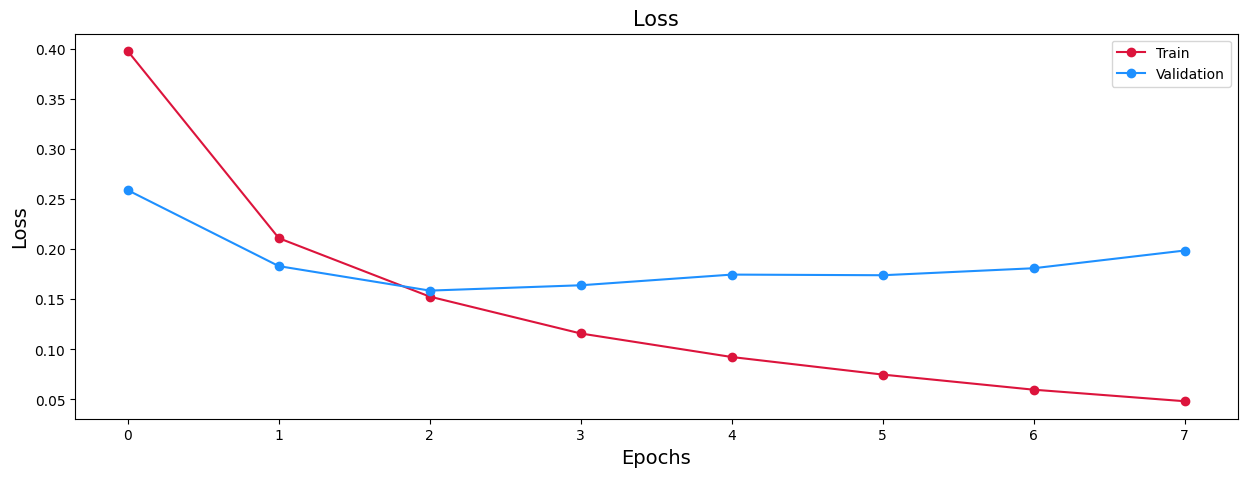

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], linestyle='solid', marker='o', color='crimson', label='Train')
plt.plot(history.history['val_loss'], linestyle='solid', marker='o', color='dodgerblue', label='Validation')
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss', fontsize=15)
plt.legend(loc='best')
fig.savefig('evaluation.png', bbox_inches='tight')
plt.show()


#### Load Model

In [24]:
from tensorflow.train import latest_checkpoint
with strategy.scope():
    reloaded_model = create_model(optimizer)
    # reloaded_model.load_weights(latest_checkpoint(checkpoint_dir))
    reloaded_model.load_weights('weights.h5')
    reloaded_model.summary()

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 3072), dtype=tf.float32, name=None), name='tf.__operators__.getitem_2/strided_slice:0', description="created by layer 'tf.__operators__.getitem_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                               

### Predict on test data

In [25]:
y_test[0]

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [26]:
y_test_argmax = np.argmax(y_test, axis=-1)
y_test_argmax

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])

In [27]:
def predict(model, inputs, batch_size=1, verbose=0):
    y_pred = model.predict(inputs, batch_size=batch_size, verbose=verbose)
    y_pred = y_pred.reshape(len(y_pred), -1, 3)
    return np.argmax(y_pred, axis=-1) # sentiment values (position that have max value)
def print_acsa_pred(replacements, categories, sentence_pred):
    sentiments = map(lambda x: replacements[x], sentence_pred)
    for category, sentiment in zip(categories, sentiments):
        if sentiment: print(f'=> {category},{sentiment}')


with strategy.scope():
    y_pred = predict(reloaded_model, test_tf_dataset, BATCH_SIZE, verbose=1)
    reloaded_model.evaluate(test_tf_dataset,batch_size=BATCH_SIZE, verbose=1)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7cc38160b5b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7cc38160b5b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 28s 622ms/step


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7cc37ac62dd0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7cc37ac62dd0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 21s 287ms/step - loss: 0.6456


In [29]:
replacements = {0: 'None', 1: 'positive', 2: 'negative'}
categories = df_test.columns[2:]
print('Example:', df_test['comment'][1])
print_acsa_pred(replacements, categories, y_pred[1])

Example: sp ok. youtube tiktok hợp_lý . game mua mini 2
=> price,None
=> service,None
=> ship,None
=> performance,positive
=> genuine,None
=> configuration,None
=> access,None
=> other,None
=> model,None


### 5. Evaluate

#### Detection Aspects

In [30]:
aspect_test = []
aspect_pred = []

for row_test, row_pred in zip(y_test_argmax, y_pred):
    for index, (col_test, col_pred) in enumerate(zip(row_test, row_pred)):
        aspect_test.append(bool(col_test) * categories[index])
        aspect_pred.append(bool(col_pred) * categories[index])

In [31]:

from sklearn.metrics import classification_report
aspect_report = classification_report(aspect_test, aspect_pred, digits=4, zero_division=1, output_dict=True)
print(classification_report(aspect_test, aspect_pred, digits=4, zero_division=1))

               precision    recall  f1-score   support

                  0.8689    0.8860    0.8774      2499
       access     1.0000    0.0000    0.0000        25
configuration     1.0000    0.0000    0.0000       134
      genuine     1.0000    0.1569    0.2712        51
        model     0.8659    0.8554    0.8606       166
        other     0.2500    0.0250    0.0455        40
  performance     0.3791    0.9813    0.5469       107
        price     0.7568    0.9180    0.8296        61
      service     0.6726    0.9187    0.7766       123
         ship     0.8276    0.5806    0.6825       124

     accuracy                         0.8141      3330
    macro avg     0.7621    0.5322    0.4890      3330
 weighted avg     0.8430    0.8141    0.7929      3330



#### Polarity

In [32]:
y_test_flat = y_test_argmax.flatten()
y_pred_flat = y_pred.flatten()
target_names = list(map(str, replacements.values()))


In [33]:
polarity_report = classification_report(y_test_flat, y_pred_flat, digits=4, output_dict=True)
print(classification_report(y_test_flat, y_pred_flat, target_names=target_names, digits=4))


              precision    recall  f1-score   support

        None     0.8689    0.8860    0.8774      2499
    positive     0.6552    0.6114    0.6326       718
    negative     0.4018    0.3982    0.4000       113

    accuracy                         0.8102      3330
   macro avg     0.6420    0.6319    0.6366      3330
weighted avg     0.8070    0.8102    0.8084      3330



#### Aspect + Polarity

In [34]:
aspect_polarity_test = []
aspect_polarity_pred = []

for row_test, row_pred in zip(y_test_argmax, y_pred):
    for index, (col_test, col_pred) in enumerate(zip(row_test, row_pred)):
        aspect_polarity_test.append(f'{categories[index]},{replacements[col_test]}')
        aspect_polarity_pred.append(f'{categories[index]},{replacements[col_pred]}')



In [35]:
aspect_polarity_report = classification_report(aspect_polarity_test, aspect_polarity_pred, digits=4, zero_division=1, output_dict=True)
print(classification_report(aspect_polarity_test, aspect_polarity_pred, digits=4, zero_division=1))

                        precision    recall  f1-score   support

           access,None     0.9324    1.0000    0.9650       345
       access,negative     1.0000    0.0000    0.0000         7
       access,positive     1.0000    0.0000    0.0000        18
    configuration,None     0.6378    1.0000    0.7789       236
configuration,negative     1.0000    0.0000    0.0000        35
configuration,positive     1.0000    0.0000    0.0000        99
          genuine,None     0.8812    1.0000    0.9369       319
      genuine,negative     0.0000    0.0000    0.0000         4
      genuine,positive     1.0000    0.1489    0.2593        47
            model,None     0.8835    0.8922    0.8878       204
        model,negative     0.6316    0.7500    0.6857        16
        model,positive     0.8897    0.8600    0.8746       150
            other,None     0.8934    0.9909    0.9397       330
        other,negative     0.0000    1.0000    0.0000         0
        other,positive     0.0000    0.

### Predict for Actual Data

In [ ]:
test_data = pd.read_csv('tiki_cmt.csv')

In [ ]:
test_data.columns

Index(['Unnamed: 0', 'comment_id', 'product_id', 'content', 'customer_id',
       'seller_id', 'rating', 'date'],
      dtype='object')

In [ ]:
test_data = test_data[['comment_id','content']]

In [ ]:
test_data = test_data.rename(columns = {'content' : 'cmt', 'comment_id': 'id'})

In [ ]:
from datasets import Dataset
test_df_with_categories = test_data.copy()
category_columns = df_train.columns[2:]
for col in category_columns:
    test_df_with_categories[col] = 0

used_dataset = Dataset.from_pandas(test_df_with_categories)

# Create a DatasetDict containing the splits
datasets = DatasetDict({'train': train_dataset, 'val': val_dataset, 'test': used_dataset})

tokenized_data = datasets.map(tokenize_function, batched=True)
tokenized_data.set_format(type='tensorflow', columns=tokenizer.model_input_names)
y_test_new = make_outputs(test_df_with_categories)



Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

Map:   0%|          | 0/370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2999 [00:00<?, ? examples/s]

In [ ]:
from tensorflow.data import Dataset
test_dataset = preprocess_tokenized_dataset(tokenized_data['test'], tokenizer, y_test_new, BATCH_SIZE, repeat=False)

In [ ]:
test_dataset

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 27), dtype=tf.uint8, name=None))>

In [ ]:
from tensorflow.train import latest_checkpoint
with strategy.scope():
    reloaded_model = create_model(optimizer)
    # reloaded_model.load_weights(latest_checkpoint(checkpoint_dir))
    reloaded_model.load_weights('weights.h5')

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 3072), dtype=tf.float32, name=None), name='tf.__operators__.getitem_1/strided_slice:0', description="created by layer 'tf.__operators__.getitem_1'")


In [ ]:
def predict(model, inputs, batch_size=1, verbose=0):
    y_pred = model.predict(inputs, batch_size=batch_size, verbose=verbose)
    y_pred = y_pred.reshape(len(y_pred), -1, 3)
    return np.argmax(y_pred, axis=-1) # sentiment values (position that have max value)
def print_acsa_pred(replacements, categories, sentence_pred):
    sentiments = map(lambda x: replacements[x], sentence_pred)
    for category, sentiment in zip(categories, sentiments):
        if sentiment: print(f'=> {category},{sentiment}')


with strategy.scope():
    y_pred = predict(reloaded_model, test_dataset, BATCH_SIZE, verbose=1)
    reloaded_model.evaluate(test_dataset,batch_size=BATCH_SIZE, verbose=1)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x79a37ff253f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x79a37ff253f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
150/150 [==============================] - 16s 67ms/step


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x79a37da6ad40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x79a37da6ad40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
150/150 [==============================] - 16s 31ms/step - loss: 0.5940


In [ ]:
replacements = {0: 'None', 1: 'positive', 2: 'negative'}
categories = test_df_with_categories.columns[2:]
print('Example:', test_df_with_categories['cmt'][2])
print_acsa_pred(replacements, categories, y_pred[2])

Example: hàng đẹp , phụ_kiện đầy_đủ , máy cầm đầm tay_chơi game mượt_thơm mùi polime . cảm_ơn shop nhé
=> price,None
=> service,None
=> ship,None
=> performance,None
=> genuine,None
=> configuration,None
=> access,positive
=> other,None
=> model,positive


In [ ]:
result = test_df_with_categories.copy()
for i, col in enumerate(categories):
    result[col] = [replacements[pred] for pred in y_pred[:, i]]

for col in categories:
    result[col] = result[col].map({'None': 0, 'positive': 1, 'negative': 2})

result

,id,cmt,price,service,ship,performance,genuine,configuration,access,other,model
0,19360301,giao hàng nhanh . hàng chính hãng đẹp giới_thi...,0,0,1,0,1,0,0,0,1
1,18884049,nhanh_chóng kỹ máy hịn cám_ơn shop tiki,0,0,1,0,0,0,0,0,0
2,18593332,"hàng đẹp , phụ_kiện đầy_đủ , máy cầm đầm tay_c...",0,0,0,0,0,0,1,0,1
3,18540856,"quá tốt giá tiền . mua cha sử_dụng lướt_mượt ,...",1,0,0,1,0,1,0,0,0
4,18474709,dùng khá ổn tầm tiền bỏ . giáo hàng bọc cẩn_th...,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,18674812,"sạc pin vô nhanh , sạc nóng , thiết_kế nhỏ gọn...",0,0,1,0,0,0,2,0,0
2995,18432298,sạc nhanh đóng_gói cẩn_thận . khá uy_tín . ủng...,0,1,1,0,0,0,0,0,0
2996,19344473,"đóng_gói cẩn_thận , giao hàng nhanh_chóng . gi...",1,0,1,0,0,0,0,0,0
2997,19030059,"sạc nhanh , nóng_máy , kiểu_dáng đẹp",0,0,0,0,0,1,0,0,1


In [ ]:
result.to_csv('tiki_reviews_label.csv')